In [2]:
# Import the required libraries and dependencies

import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline
from decimal import *

# import web3 library to support Quicknode API
from web3 import Web3, HTTPProvider

# import SDK libraries from OpenSea / MagicEden if/when available



In [3]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [ ]:
# Set the Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [ ]:
# Make an API call to access the current price of BTC

btc_response = requests.get(btc_url).json()

# Display the response data
print(json.dumps(btc_response, indent=4, sort_keys=True))

In [ ]:
# Make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Display the response data
print(json.dumps(eth_response, indent=4, sort_keys=True))

In [ ]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
btc_price

In [ ]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price

In [ ]:
# Set the current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

In [ ]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [ ]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day
timeframe = "1Day"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

In [ ]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

In [ ]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
agg_close_price

In [ ]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(prices_df["SPY"]["close"])

# Print the AGG closing price
spy_close_price

In [ ]:
# Request daily_returns data for a collection from OpenSea API

# os_response = requests.get(<INSERT OS ENDPOINT>).json()



In [ ]:
# Request daily_returns data for a collection from MagicEden API

# me_response = requests.get(<INSERT ME ENDPOINT>).json()



In [ ]:
# Calculate the pct_change of OS and ME dataframes


In [ ]:
# Calculate the covariance, beta, and sharpe ratios of OS and ME dataframes


In [ ]:
# Perform Monte Carlo simulations for OS and ME data

In [ ]:
# Set the base url for the NFTPort API
base_nftport_url = "https://api.nftport.xyz/v0"

# Set the headers, including for authentication
token = os.getenv("NFTPORT_API_KEY")
headers = {'Authorization': token}


In [ ]:
def get_nfts_for_account(chain, account):
  
    response = requests.get(base_nftport_url + "/accounts/" + account + f"?chain={chain}", headers=headers).json()
    return response
    
def get_transactions_for_nft(chain, trans_type, contract_address, token_id):
    
    response = requests.get(base_nftport_url + "/transactions/nfts/" + contract_address + "/" + token_id + f"?chain={chain}&type={trans_type}", headers=headers).json()
    return response
    

In [ ]:

# Call function to get transactions, returns json
response = get_transactions_for_nft("ethereum", "sale", "0x0eff88e66eb717f8f7e0701345f1cc119b487f86", "4849")

# create a dataframe from the response data
response_df = pd.DataFrame(response)
display(response_df)

# Flatten the json to read the transactions into a dataframe
transactions_df = pd.json_normalize(response, record_path =['transactions'])

transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
transactions_df.set_index('transaction_date')

# display(transactions_df.info())
# display(transactions_df.sort_values(by=['transaction_date']))

transactions_df["sale_returns"] = transactions_df["price_details.price_usd"].pct_change(periods = 1)
display(transactions_df)


In [ ]:
# Test out web3 request to Quicknode

w3 = Web3(Web3.HTTPProvider("https://dry-blue-voice.discover.quiknode.pro/1d4c5fcbe9424842ec36559bb9a692c5761ead48/"))
w3.eth.getBlock('latest') # get latest block details
w3.eth.blockNumber # get latest block number



In [ ]:

#Make request to Quicknode API to fetch NFT collection details

OPTIONS = {
  'headers':
    {
      'x-qn-api-version': '1'
    }
}
w3 = Web3(HTTPProvider('https://dry-blue-voice.discover.quiknode.pro/1d4c5fcbe9424842ec36559bb9a692c5761ead48/', request_kwargs=OPTIONS))
resp = w3.provider.make_request('qn_fetchNFTCollectionDetails', {
  "contracts": [
    "0x60E4d786628Fea6478F785A6d7e704777c86a7c6",
    "0x7Bd29408f11D2bFC23c34f18275bBf23bB716Bc7"
  ]
})
print(resp)

In [ ]:
# Make request to Quicknode to fetch NFTs from my wallet

OPTIONS = {
  'headers':
    {
      'x-qn-api-version': '1'
    }
}
w3 = Web3(HTTPProvider('https://dry-blue-voice.discover.quiknode.pro/1d4c5fcbe9424842ec36559bb9a692c5761ead48/', request_kwargs=OPTIONS))
resp = w3.provider.make_request('qn_fetchNFTs', {
  "wallet": "0xeA70F5fcf0E51900D13B7992B0996530f036A133",
  "omitFields": [
    "provenance",
    "traits"
  ],
  "page": 1,
  "perPage": 10,
  "contracts": [
    "0xd153f0014db6d1f339c6340d2c9f59214355d9d7",
    "0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D"
  ]
})
print(resp)

### Experimenting with Covalent API

In [ ]:
# Get your own Covalent API Key from https://www.covalenthq.com/
# Store that key in your .env as COVALENT_API_KEY=<INSERT-YOUR-KEY>

covalent_api_key = os.getenv("COVALENT_API_KEY")

In [ ]:
# Set base URL for Covalent API
base_url = "https://api.covalenthq.com/v1/"

In [ ]:
# Set blockchain_id
blockchain_chain_id = '1'

# Set your wallet address
demo_address = '0xeA70F5fcf0E51900D13B7992B0996530f036A133'

def get_wallet_balance(chain_id, address):
    endpoint = f'{chain_id}/address/{address}/balances_v2/?key={covalent_api_key}'
    url = base_url + endpoint
    result = requests.get(url).json()
    data = result["data"]
    print(json.dumps(data, indent=4, sort_keys=True))
    #display(data)


# Example address request
get_wallet_balance(blockchain_chain_id, demo_address)



# Rarity API Sample Code

,avg_price,max_price,min_price,time,trades,unique_buyers,volume,transaction_date_time,avg_price_in_eth,pct_change
1,99362062000000000000,150000000000000000000,5000000000000000,2022-04-13T00:00:00Z,16,14,1589793000000000000000,2022-04-13 00:00:00+00:00,99.362062,-0.351851
2,91256666000000000000,125000000000000000000,25005000000000000000,2022-04-14T00:00:00Z,9,8,821310000000000000000,2022-04-14 00:00:00+00:00,91.256666,-0.081574
3,78194241000000000000,140000000000000000000,5000000000000000,2022-04-15T00:00:00Z,18,18,1407496339000000000000,2022-04-15 00:00:00+00:00,78.194241,-0.143139
4,87942750000000000000,131000000000000000000,5000000000000000,2022-04-16T00:00:00Z,10,10,879427500000000000000,2022-04-16 00:00:00+00:00,87.942750,0.124670
5,72576727000000000000,112690000000000000000,5000000000000000,2022-04-17T00:00:00Z,11,8,798344000000000000000,2022-04-17 00:00:00+00:00,72.576727,-0.174728
...,...,...,...,...,...,...,...,...,...,...
86,70976639000000000000,228000000000000000000,5000000000000000,2022-07-07T00:00:00Z,23,11,1632462700000000000000,2022-07-07 00:00:00+00:00,70.976639,0.021577
87,112657509000000000000,826205500000000000000,10005000000000000000,2022-07-08T00:00:00Z,22,10,2478465200000000000000,2022-07-08 00:00:00+00:00,112.657509,0.587248
88,41710023000000000000,115000000000000000000,5000000000000000,2022-07-09T00:00:00Z,21,7,875910500000000000000,2022-07-09 00:00:00+00:00,41.710023,-0.629763
89,76542625000000000000,149690000000000000000,5000000000000000,2022-07-10T00:00:00Z,32,17,2449364000000000000000,2022-07-10 00:00:00+00:00,76.542625,0.835113


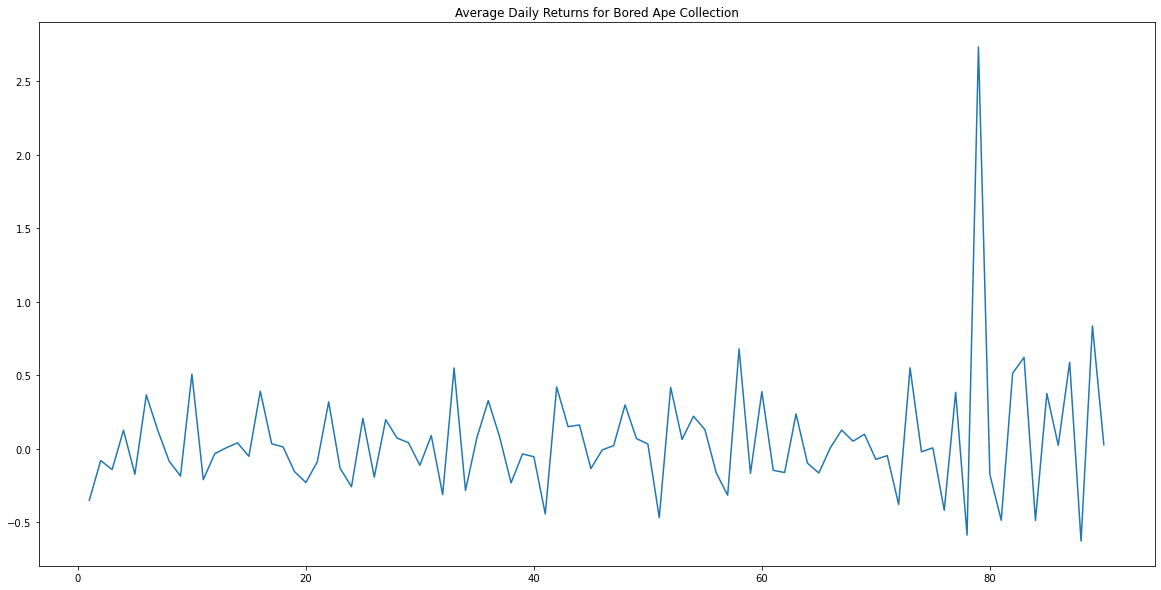

In [9]:
# Set api key
rarity_api_key = os.getenv('RARIFY_API_KEY')

# Set base url
base_url = "https://api.rarify.tech/"

# Set blockchain
blockchain = 'ethereum'

# Set contract address for NFT collection
collection = '0xBC4CA0EdA7647A8aB7C2061c2E118A18a936f13D'

# Set period
history_period = "90d"

def get_historical_nft_prices(blockchain, collection, history_period):
    url = f"{base_url}/data/contracts/{blockchain}:{collection}/insights/{history_period}"
    headers = {"Authorization": rarity_api_key}
    result = requests.get(url, headers=headers)
    data = result.json()
    
    df = pd.DataFrame (data['included'][1]['attributes']['history'])
    
    # Convert time column to datetime and set as index
    df['transaction_date_time'] = pd.to_datetime(df['time'])
    df.set_index('transaction_date_time')
    
    # Create a new column and set to number of ETH (move decimal 18 places)
    df['avg_price_in_eth'] = df['avg_price'].astype(float) / 1000000000000000000
    
    # Create a new column and set to daily pct_change in avg ETH sale price
    df['pct_change'] = df['avg_price_in_eth'].pct_change()
    
    # Pllot the daily pct_change
    df['pct_change'].plot(figsize=(20,10),title="Average Daily Returns for Bored Ape Collection")
    
    display(df.dropna())
    
    
# Call the function and pass arguments
get_historical_nft_prices(blockchain, collection, history_period)

## Get historical price data for a specific NFT

In [29]:

# Set api key
rarity_api_key = os.getenv('RARIFY_API_KEY')

# Set base url
base_url = "https://api.rarify.tech/"

# Set blockchain
blockchain = 'ethereum'

# Set contract address for NFT collection
collection = '0x1a92f7381b9f03921564a437210bb9396471050c'

# Set token_id (decimal ID on sites like OpenSea must be converted to hex)
token_id = "2574"

# set the period of time for historical prices
historical_period = "365d"

def get_historical_nft_prices_single(blockchain, collection, token_id):
    url = f"{base_url}/data/tokens/{blockchain}:{collection}:{token_id}/insights/{historical_period}"
    headers = {"Authorization": rarity_api_key}
    result = requests.get(url, headers=headers)
    data = result.json()
    
    display(data)
    
    df = pd.DataFrame (data['included'][1]['attributes']['history'])
    
    # Convert time column to datetime and set as index
    df['transaction_date_time'] = pd.to_datetime(df['time'])
    df.set_index('transaction_date_time')
    
    display(df)
    
# Call the function and pass arguments
get_historical_nft_prices_single(blockchain, collection, token_id)

{'data': {'id': 'ethereum:1a92f7381b9f03921564a437210bb9396471050c:2574:365d',
  'type': 'insights',
  'relationships': {'history': {'data': {'id': 'ethereum:1a92f7381b9f03921564a437210bb9396471050c:2574:365d',
     'type': 'insights-history'}},
   'insights': {'data': {'id': 'ethereum:1a92f7381b9f03921564a437210bb9396471050c:2574:365d',
     'type': 'insights-overview'}}}},
 'included': [{'id': 'ethereum:1a92f7381b9f03921564a437210bb9396471050c:2574:365d',
   'type': 'insights-overview',
   'attributes': {'avg_price': '4675000000000000000',
    'max_price': '5400000000000000000',
    'min_price': '3950000000000000000',
    'payment_asset': {'code': 'ETH',
     'image_url': 'https://rarify-public.s3.amazonaws.com/eth_logo.svg'},
    'period': '365d',
    'trades': 2,
    'unique_buyers': 2,
    'volume': '9350000000000000000'}},
  {'id': 'ethereum:1a92f7381b9f03921564a437210bb9396471050c:2574:365d',
   'type': 'insights-history',
   'attributes': {'history': [{'avg_price': '54000000000

,avg_price,max_price,min_price,time,trades,unique_buyers,volume,transaction_date_time
0,5400000000000000000,5400000000000000000,5400000000000000000,2021-08-30T00:00:00Z,1,1,5400000000000000000,2021-08-30 00:00:00+00:00
1,3950000000000000000,3950000000000000000,3950000000000000000,2022-06-19T00:00:00Z,1,1,3950000000000000000,2022-06-19 00:00:00+00:00
